In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.express as px

In [2]:
sns.set(
    font_scale =4,
    style      ="whitegrid",
    rc         ={'figure.figsize':(30,10)}
)

In [3]:
ads_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/WORK_FILES/ads_data.csv')

In [4]:
ads_clients_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/WORK_FILES/ads_clients_data.csv')

In [5]:
ads_data['time'] = pd.to_datetime(ads_data.time)

In [6]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [7]:
ads_data.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [8]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [9]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [10]:
mean_event = ads_data.groupby(['ad_id','event'], as_index=False) \
    .agg(value_count=('time', 'count')) \
    .pivot(index='ad_id', columns='event', values='value_count') \
    .fillna(0) \
    .mean().round()

In [11]:
mean_event

event
click    113.0
view     923.0
dtype: float64

In [12]:
bit = ads_data.groupby(['ad_id','event'], as_index=False) \
    .agg(value_count=('time', 'count'))

In [13]:
np.log(bit.query('event == "view"').value_count)

1       4.615121
3       5.214936
5       3.713572
6       3.555348
8       4.060443
          ...   
1475    4.605170
1476    5.049856
1477    4.219508
1479    4.927254
1480    3.737670
Name: value_count, Length: 956, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


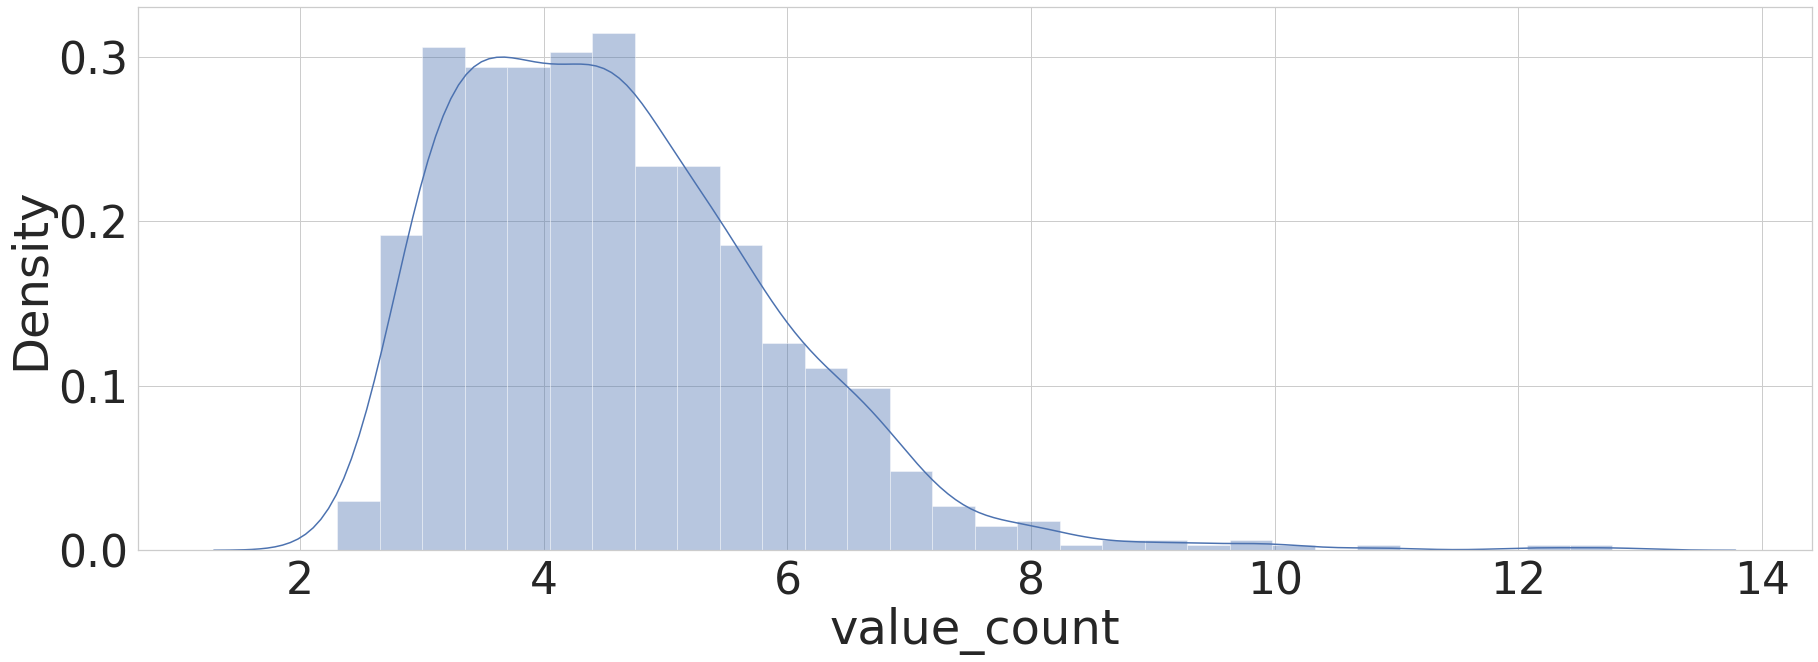

In [14]:
sns.distplot(np.log(bit.query('event == "view"').value_count))

In [15]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [16]:
ad_id_time = ads_data.query('event == "view"').groupby(['ad_id','date'], as_index=False).agg(count_time=('event', 'count'))

In [17]:
count_time_mean = ad_id_time.groupby('date').agg({'count_time':'mean'}).rolling(2).mean().query('date == "2019-04-06"')

In [18]:
common_mean = ad_id_time.groupby('date',as_index=False).agg({'count_time':'mean'})

In [19]:
common_mean.dtypes

date          datetime64[ns]
count_time           float64
dtype: object

In [21]:
rolling_mean = ad_id_time.groupby('date').agg({'count_time':'mean'}).rolling(2).mean().rename(columns={'count_time':'count_time_rolling'})

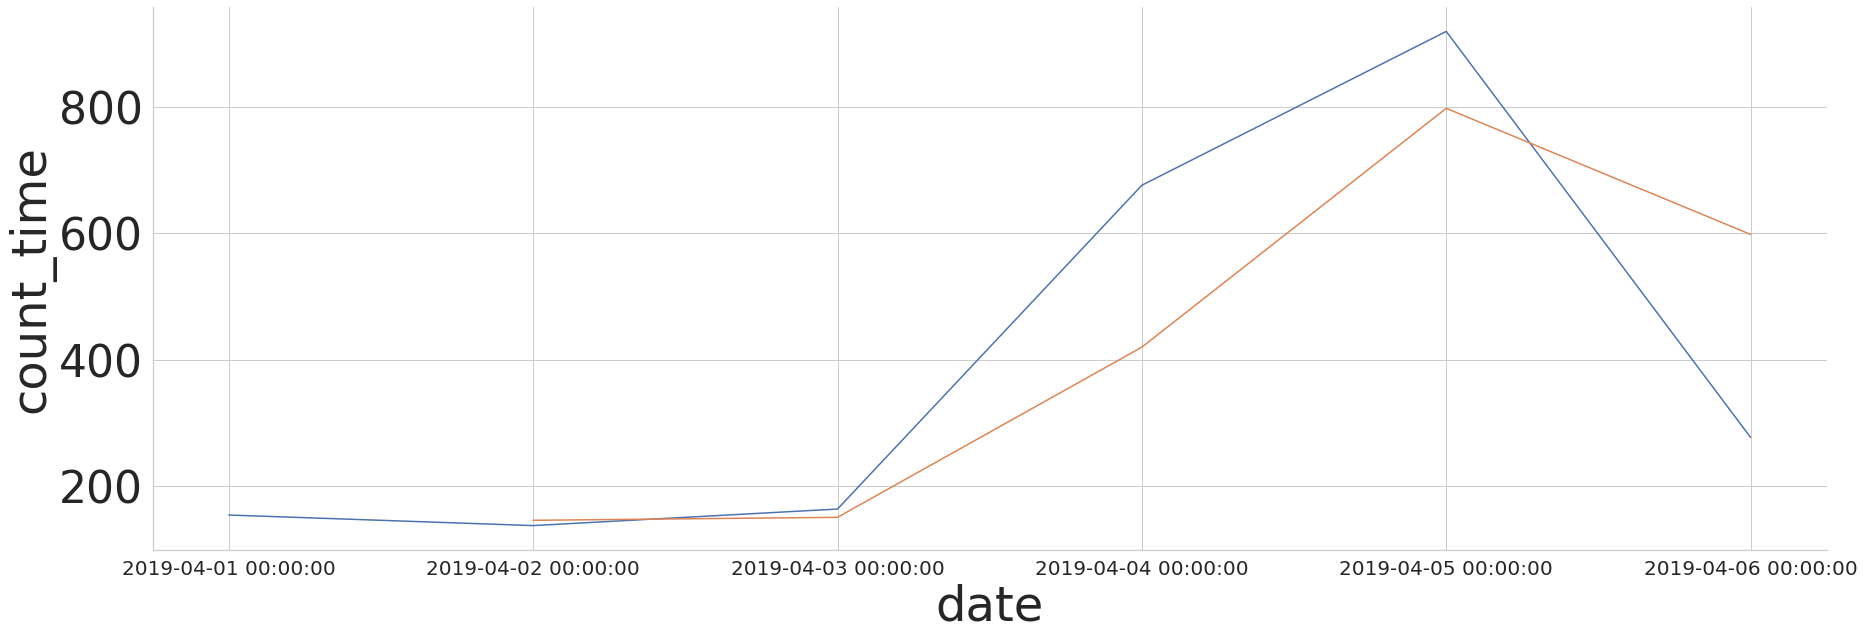

In [22]:
ax = sns.lineplot(data = common_mean, x='date', y='count_time')
ax.set_xticklabels(common_mean.date,fontsize = 20)
sns.despine()
sx = sns.lineplot(data = rolling_mean, x='date', y='count_time_rolling')
sx.set_xticklabels(common_mean.date,fontsize = 20)
sns.despine()

In [23]:
common_mean = common_mean.set_index('date')

In [24]:
rolling_mean= rolling_mean.fillna(0).rename(columns={'count_time_rolling':'count_time'})

In [25]:
abs_different = abs(common_mean - rolling_mean)

In [26]:
abs_different.idxmax()

count_time   2019-04-06
dtype: datetime64[ns]

In [27]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [28]:
ads_data.shape

(1000000, 11)

In [29]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [30]:
ads_clients_data.shape

(122078, 4)

In [31]:
ads_clients_data['date'] = pd.to_datetime(ads_clients_data.date)

In [32]:
ads_clients_data.create_date = pd.to_datetime(ads_clients_data.create_date)

In [55]:
full_ads = pd.merge(ads_data, ads_clients_data, how='inner', on='client_union_id' )

In [57]:
ads_clients_data.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [58]:
full_ads.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [59]:
full_ads.client_union_id.count()

1000000

In [60]:
full_ads.dtypes

date_x                   datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
date_y                   datetime64[ns]
community_id                      int64
create_date              datetime64[ns]
dtype: object

In [61]:
full_ads = full_ads.assign(difference = (full_ads.date_x - full_ads.create_date))

In [62]:
full_ads.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,difference
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days


In [63]:
min_advertising = full_ads.groupby('client_union_id', as_index=False).agg({'difference':'min'})

In [64]:
min_advertising

,client_union_id,difference
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [67]:
min_advertising.loc[min_advertising.difference < pd.Timedelta(365, unit='days')]

,client_union_id,difference
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [71]:
ads_clients_data.client_union_id.nunique()

122078

In [79]:
 round((min_advertising.client_union_id.nunique() / ads_clients_data.client_union_id.nunique()) * 100, 2)

0.69

In [110]:
group_names =  pd.to_timedelta(['0 days', '30 days', '90 days', '180 days', '365days'])

In [127]:
cuts = ['0 - 30', '30 - 90', '90 - 180', '180 - 365']

In [128]:
min_advertising['intervals'] = pd.cut(min_advertising.difference,bins=group_names,labels=cuts)

In [129]:
grath = min_advertising.groupby('intervals', as_index=False).agg({'client_union_id':'count'})

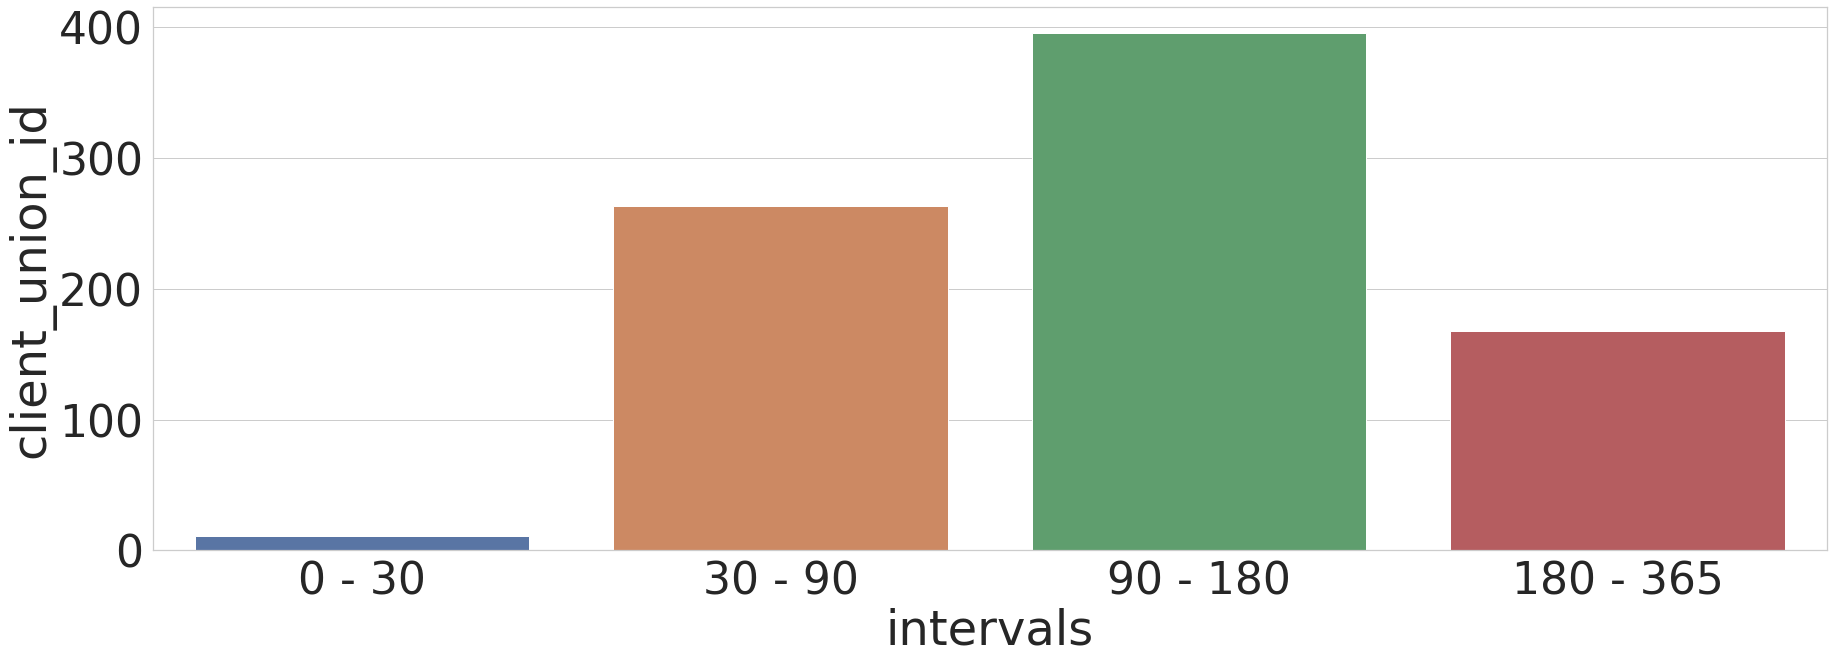

In [130]:
sns.barplot(data = grath, x='intervals', y='client_union_id')